# The Learning Rate
Hands-on activity with Python  
Editor: Saeid SHARIFY  
Date: 2021/08/08  

#### Imports and Packages

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [14]:
# generate some data
x_2 = np.linspace(-2, 2, 1000)

# writing the g(x) function and the dg(x) function
def g(x):
    return (x**4) - (4*x**2) + 5

def dg(x):
    return (4*x**3) - (8*x)

In [15]:
# writing the gradient descent function
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, 
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

#### The Learning Rate

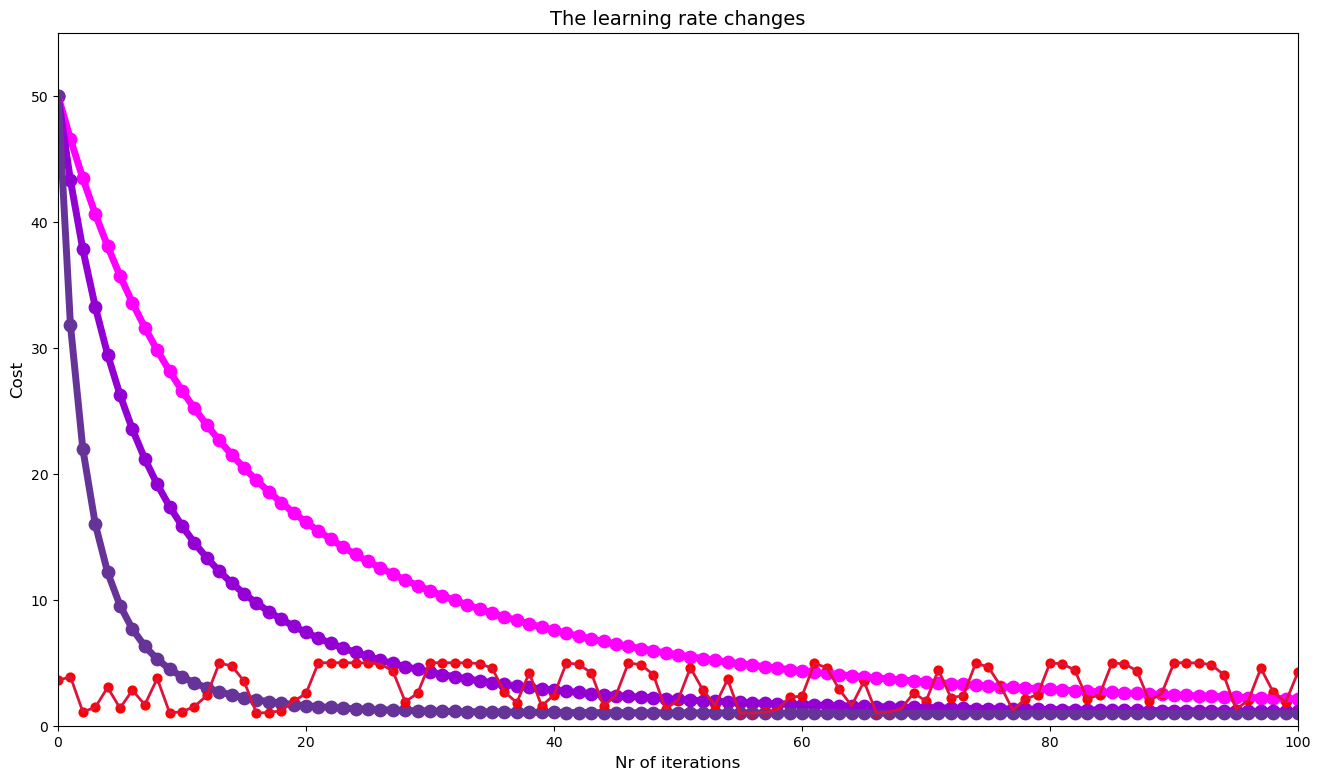

In [47]:
# running gradient descent 3+1 times
n = 100

low_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.0005, precision=0.0001, max_iter=n)
# plotting three more learning rates

# mid_gamma (0.001)
mid_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.001, precision=0.0001, max_iter=n)

# high_gamma(0.003)
high_gamma = gradient_descent(derivative_func=dg, initial_guess= 3,
                                                multiplier=0.003, precision=0.0001, max_iter=n)

# insance_gamma(0.2)
insane_gamma = gradient_descent(derivative_func=dg, initial_guess= 1.9,
                                                multiplier=0.2, precision=0.0001, max_iter=n)



# plotting reduction in cost for each iteration
plt.figure(figsize=[16, 9])
plt.xlim(0, n)
plt.ylim(0, 55)
plt.title('The learning rate changes', fontsize=14)
plt.xlabel('Nr of iterations', fontsize=12)
plt.ylabel('Cost', fontsize=12)

# converting the lists to numpy arrays for Y axis data
low_values = np.array(low_gamma[1])
# creating a list from 0 to n+1 for X axis data
iteration_list = list(range(0, n+1))

# low learning rate
plt.plot(iteration_list, g(low_values), color='magenta', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='magenta', s=80)

# mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='darkviolet', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='darkviolet', s=80)

# high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='rebeccapurple', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='rebeccapurple', s=80)

# insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='crimson', linewidth=2)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='r', s=40)

plt.show()